In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/datasets_535863_984605_Foreign_Exchange_Rates.csv')

In [ ]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

Time Serie  ... THAILAND - BAHT/US$
0  2000-01-03  ...               36.97
1  2000-01-04  ...               37.13
2  2000-01-05  ...                37.1
3  2000-01-06  ...               37.62
4  2000-01-07  ...                37.3

[5 rows x 23 columns]

In [ ]:
for col in df.columns:
    for counter,val in enumerate(df[col]):
        if val=='ND' :
           df[col][counter]=np.nan 

In [ ]:
df.shape

(5217, 23)

In [ ]:
df.isnull().sum()

Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANKAN RUPEE/US$             198
SWITZERLAND - FRANC/

In [ ]:
df=df.bfill().ffill()

In [ ]:
df.isnull().sum()

Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND - FRANC/US$                      0
TAIWAN - NEW 

In [ ]:
df = df.set_index("Time Serie")
df.index = pd.to_datetime(df.index)
df = df.astype(float)

In [ ]:
df.tail()

AUSTRALIA - AUSTRALIAN DOLLAR/US$  ...  THAILAND - BAHT/US$
Time Serie                                     ...                     
2019-12-25                             1.4411  ...                30.15
2019-12-26                             1.4411  ...                30.15
2019-12-27                             1.4331  ...                30.14
2019-12-30                             1.4278  ...                29.94
2019-12-31                             1.4225  ...                29.75

[5 rows x 22 columns]

In [ ]:
new_df= df[['INDIA - INDIAN RUPEE/US$','CHINA - YUAN/US$','JAPAN - YEN/US$','UNITED KINGDOM - UNITED KINGDOM POUND/US$','BRAZIL - REAL/US$']].copy()

In [ ]:
new_df.head()

INDIA - INDIAN RUPEE/US$  ...  BRAZIL - REAL/US$
Time Serie                            ...                   
2000-01-03                     43.55  ...             1.8050
2000-01-04                     43.55  ...             1.8405
2000-01-05                     43.55  ...             1.8560
2000-01-06                     43.55  ...             1.8400
2000-01-07                     43.55  ...             1.8310

[5 rows x 5 columns]

# **Simulating Foreign Exchange Rate** 



In [ ]:
test_df=df[['INDIA - INDIAN RUPEE/US$']].copy()

In [ ]:
test_df.head()

INDIA - INDIAN RUPEE/US$
Time Serie                          
2000-01-03                     43.55
2000-01-04                     43.55
2000-01-05                     43.55
2000-01-06                     43.55
2000-01-07                     43.55

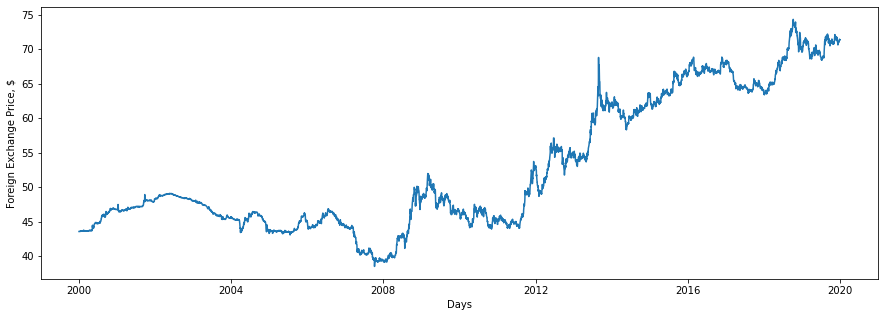

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(test_df.index, test_df['INDIA - INDIAN RUPEE/US$'])
plt.xlabel('Days')
plt.ylabel('Foreign Exchange Price, $')
plt.show()

In [ ]:
print("Start Date = {}".format(test_df.index[0]))
print("End Date = {}".format(test_df.index[-1]))

Start Date = 2000-01-03 00:00:00
End Date = 2019-12-31 00:00:00


In [ ]:
# s0 is the intial exchange price
s0=df['INDIA - INDIAN RUPEE/US$'][-1]
print(s0)

71.36


In [ ]:
#Time increment in our model
dt=0.5
print(dt)

0.5


In [ ]:
#Prediction of No. of days
T=30
print(T)

30


In [ ]:
N=T/dt
print(N)

60.0


In [ ]:
t = np.arange(1, int(N) + 1)
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]


In [ ]:
returns = (test_df.loc[test_df.index[1]:, 'INDIA - INDIAN RUPEE/US$'] - test_df.shift(1).loc[test_df.index[1]:, 'INDIA - INDIAN RUPEE/US$']) / test_df.shift(1).loc[test_df.index[1]:, 'INDIA - INDIAN RUPEE/US$']
print(returns.tolist())

[0.0, 0.0, 0.0, 0.0, 0.0, 0.001148105625717664, 0.0, -0.0011467889908257857, 0.0, 0.001148105625717664, 0.0, 0.0, 0.0, 0.0, 0.00045871559633018396, -0.0006877579092158192, 0.0013764624913969986, -0.00045819014891170727, 0.0004584001833599821, 0.0, -0.0006872852233677237, 0.0006877579092159821, 0.0, 0.0, -0.00022909507445585363, -0.00022914757103570144, 0.0004584001833599821, -0.001603665521191301, 0.0016062413951353897, 0.0, -0.00022909507445585363, 0.0025206232813932044, -0.0016000000000000066, 0.0, -0.0006868131868132129, 0.0, 0.0006872852233677237, -0.0006868131868132129, 0.0, 0.0006872852233677237, -0.0006868131868132129, -0.00045819014891170727, 0.0004584001833599821, 0.0, -0.00045819014891170727, 0.0, 0.0004584001833599821, -0.00045819014891170727, 0.0004584001833599821, 0.0, -0.00022909507445585363, 0.00022914757103570144, -0.001603665521191301, 0.0016062413951353897, -0.00045819014891170727, -0.0009168003667201271, 0.0013764624913969986, 0.0, 0.0, -0.0006872852233677237, 0.0006

In [ ]:
returns.shape

(5216,)

In [ ]:
mu = np.mean(returns)

print(mu)

0.00010414192667767903


In [ ]:
sigma = np.std(returns)
print(sigma)

0.00435196868542231


In [ ]:
scen_size = 10
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
print(b)

{'1': array([ 0.31625795,  3.36311104,  0.92481758, -0.13536798, -0.67083796,
       -0.19945111,  1.38327828,  0.41762666, -1.13507927,  2.09816817,
       -0.14563613,  0.43682711,  0.49047895, -2.89888457, -0.15025395,
       -1.09687755, -0.75251427, -0.12948389, -0.17590249,  0.39438223,
       -1.14411421,  0.46887933,  0.88055384, -0.2195162 ,  0.37956312,
        0.03978177,  0.82609155, -0.22526433,  0.10836924, -1.0498357 ,
        1.30544298,  1.11055919,  0.42959057, -0.38638117, -0.08381049,
       -1.18442459, -0.09574455, -0.98410021,  1.44752372, -1.33151746,
       -1.01156407,  0.01339682, -0.52585061,  1.34955201, -1.45657898,
        0.45885919,  0.51094395,  0.99650066, -0.91447414, -1.18636811,
        0.90361216,  0.85101412,  1.13514314,  0.03801183, -0.30371572,
       -0.12821889, -1.33718276, -1.15142818, -0.9161532 ,  0.94255606]), '2': array([-0.67082589,  1.99688103,  0.40139522, -1.23371533, -1.1024785 ,
        0.21755752,  0.43016613,  0.43611346,  1.12

In [ ]:
#Brownian Paths
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
print(W)

{'1': array([ 0.31625795,  3.67936899,  4.60418657,  4.46881859,  3.79798063,
        3.59852952,  4.9818078 ,  5.39943447,  4.2643552 ,  6.36252337,
        6.21688724,  6.65371436,  7.1441933 ,  4.24530873,  4.09505478,
        2.99817723,  2.24566296,  2.11617907,  1.94027658,  2.33465881,
        1.1905446 ,  1.65942393,  2.53997777,  2.32046157,  2.70002469,
        2.73980646,  3.56589801,  3.34063367,  3.44900291,  2.39916721,
        3.70461019,  4.81516938,  5.24475995,  4.85837878,  4.77456829,
        3.5901437 ,  3.49439915,  2.51029893,  3.95782265,  2.62630519,
        1.61474112,  1.62813795,  1.10228733,  2.45183934,  0.99526037,
        1.45411955,  1.9650635 ,  2.96156416,  2.04709003,  0.86072191,
        1.76433407,  2.61534819,  3.75049133,  3.78850316,  3.48478745,
        3.35656855,  2.01938579,  0.86795761, -0.04819558,  0.89436047]), '2': array([-0.67082589,  1.32605514,  1.72745036,  0.49373503, -0.60874347,
       -0.39118595,  0.03898017,  0.47509363,  1.60

In [ ]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print("diffusion:\n", diffusion)

drift:
 [9.46721110e-05 1.89344222e-04 2.84016333e-04 3.78688444e-04
 4.73360555e-04 5.68032666e-04 6.62704777e-04 7.57376888e-04
 8.52048999e-04 9.46721110e-04 1.04139322e-03 1.13606533e-03
 1.23073744e-03 1.32540955e-03 1.42008166e-03 1.51475378e-03
 1.60942589e-03 1.70409800e-03 1.79877011e-03 1.89344222e-03
 1.98811433e-03 2.08278644e-03 2.17745855e-03 2.27213066e-03
 2.36680277e-03 2.46147488e-03 2.55614700e-03 2.65081911e-03
 2.74549122e-03 2.84016333e-03 2.93483544e-03 3.02950755e-03
 3.12417966e-03 3.21885177e-03 3.31352388e-03 3.40819599e-03
 3.50286811e-03 3.59754022e-03 3.69221233e-03 3.78688444e-03
 3.88155655e-03 3.97622866e-03 4.07090077e-03 4.16557288e-03
 4.26024499e-03 4.35491710e-03 4.44958922e-03 4.54426133e-03
 4.63893344e-03 4.73360555e-03 4.82827766e-03 4.92294977e-03
 5.01762188e-03 5.11229399e-03 5.20696610e-03 5.30163821e-03
 5.39631032e-03 5.49098244e-03 5.58565455e-03 5.68032666e-03]
diffusion:
 {'1': array([ 0.00137634,  0.0160125 ,  0.02003728,  0.01944816,

In [ ]:
S = np.array([s0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[s0] for scen in range(scen_size)]), S))
print(S)

[[71.36       71.46504901 72.52558028 72.82496195 72.78896291 72.58363924
  72.52752962 72.97236914 73.11203823 72.75865569 73.433021   73.3934416
  73.54006135 73.70418127 72.78707138 72.74637816 72.40679984 72.17689415
  72.14306283 72.09468188 72.22536446 71.8734415  72.02707109 72.31046411
  72.24825648 72.37454969 72.39393427 72.66154658 72.59722083 72.63834367
  72.31407261 72.73296141 73.09225879 73.23597039 73.11984829 73.10010359
  72.73115809 72.70774205 72.40387144 72.86832322 72.45415164 72.14271772
  72.15375457 71.99563621 72.42658218 71.97573694 72.12643987 72.29384342
  72.61491809 72.33334986 71.96766556 72.25807551 72.53305228 72.89916107
  72.91812449 72.82870233 72.79496624 72.37942706 72.02446083 71.74465787
  72.04637751]
 [71.36       71.1587109  71.78659669 71.91891577 71.54058393 71.20489858
  71.27909537 71.41942088 71.56187483 71.92115043 72.08601697 72.36934433
  72.77686874 73.09431049 73.06659657 73.16785127 73.15532743 72.06495654
  72.58218446 72.5310142

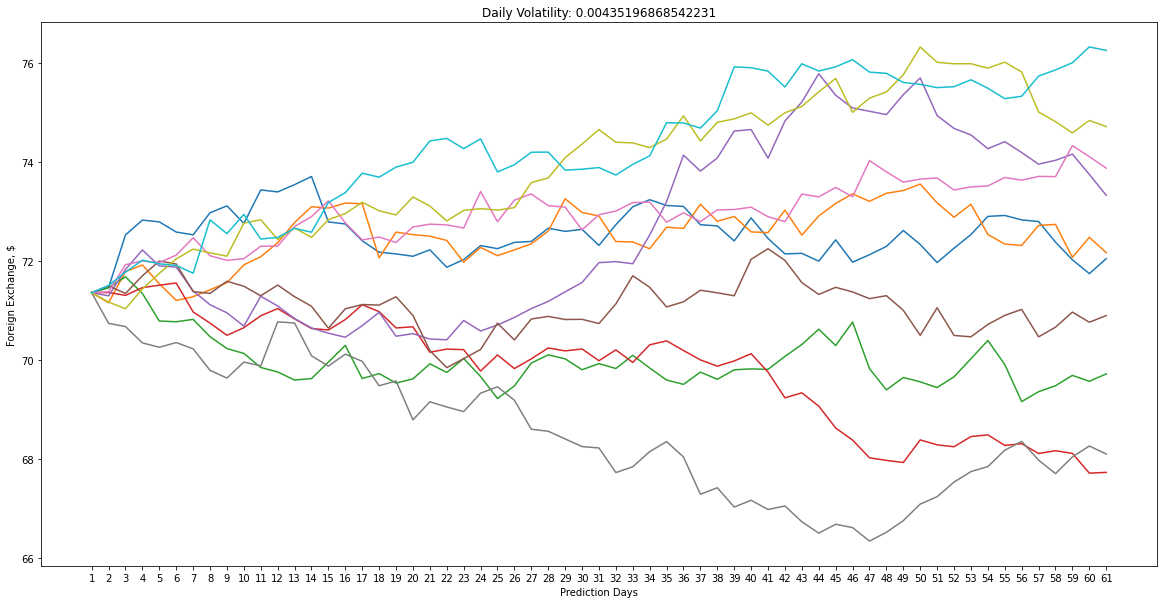

In [ ]:
plt.figure(figsize = (20,10))
x= np.arange(1,62)
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(x, S[i, :])
    plt.xticks(x)
    plt.ylabel('Foreign Exchange, $')
    plt.xlabel('Prediction Days')
    
plt.show()

## Calculating Browninan Motion for the rest of the 4 top GDP Countries



In [ ]:
#new_df=new_df.drop(columns=['INDIA - INDIAN RUPEE/US$'])

In [ ]:
new_df.head()

INDIA - INDIAN RUPEE/US$  ...  BRAZIL - REAL/US$
Time Serie                            ...                   
2000-01-03                     43.55  ...             1.8050
2000-01-04                     43.55  ...             1.8405
2000-01-05                     43.55  ...             1.8560
2000-01-06                     43.55  ...             1.8400
2000-01-07                     43.55  ...             1.8310

[5 rows x 5 columns]

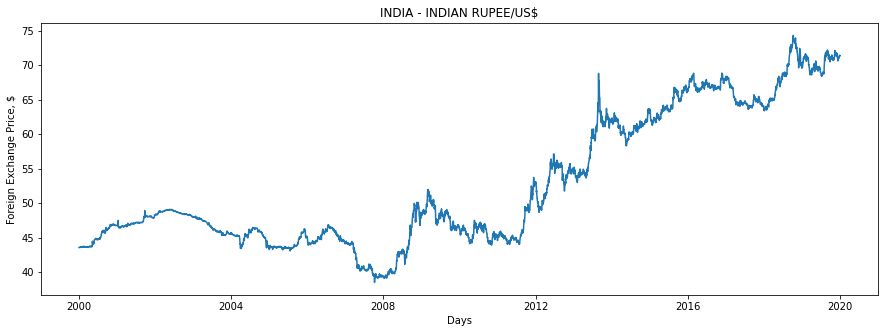

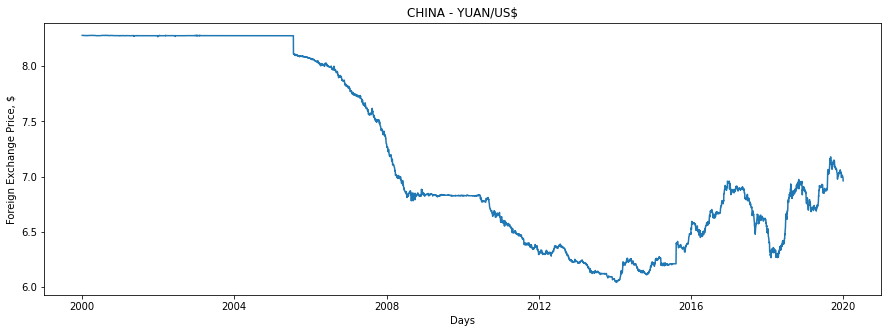

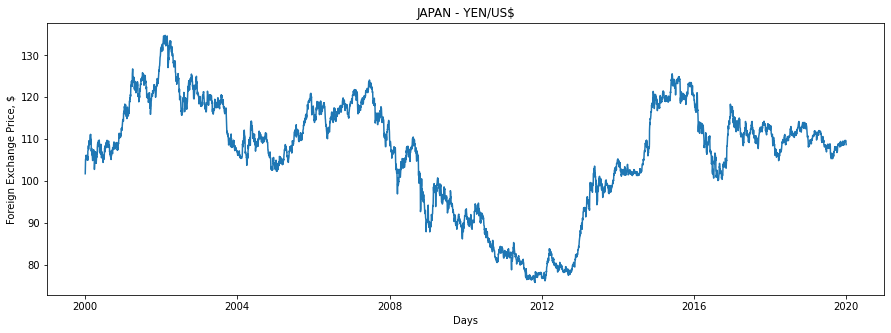

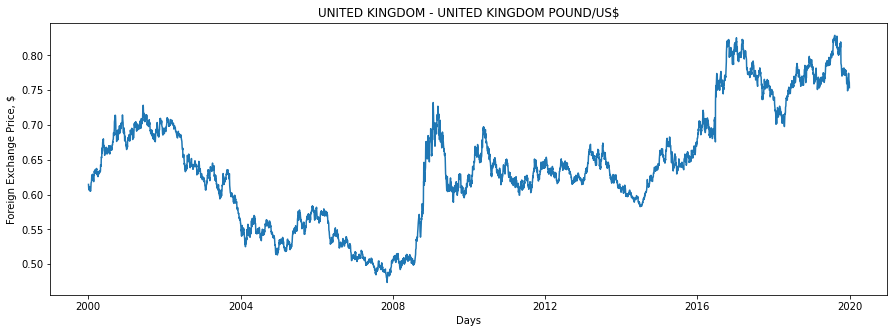

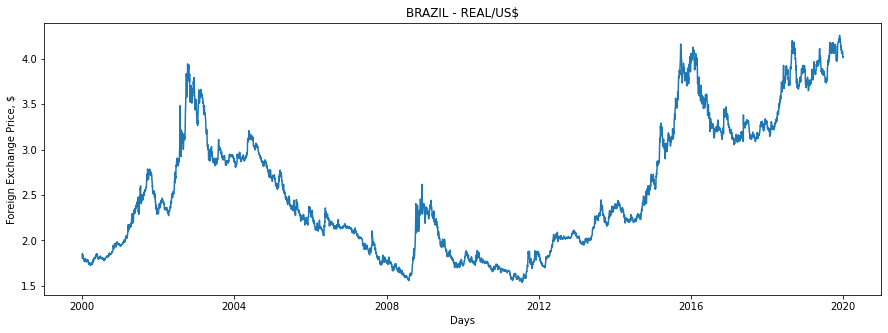

In [ ]:
for col in new_df.columns:
    plt.figure(figsize = (15, 5))
    plt.plot(new_df.index, new_df[col])
    plt.title(col)
    plt.xlabel('Days')
    plt.ylabel('Foreign Exchange Price, $')
    plt.show()

INDIA - INDIAN RUPEE/US$


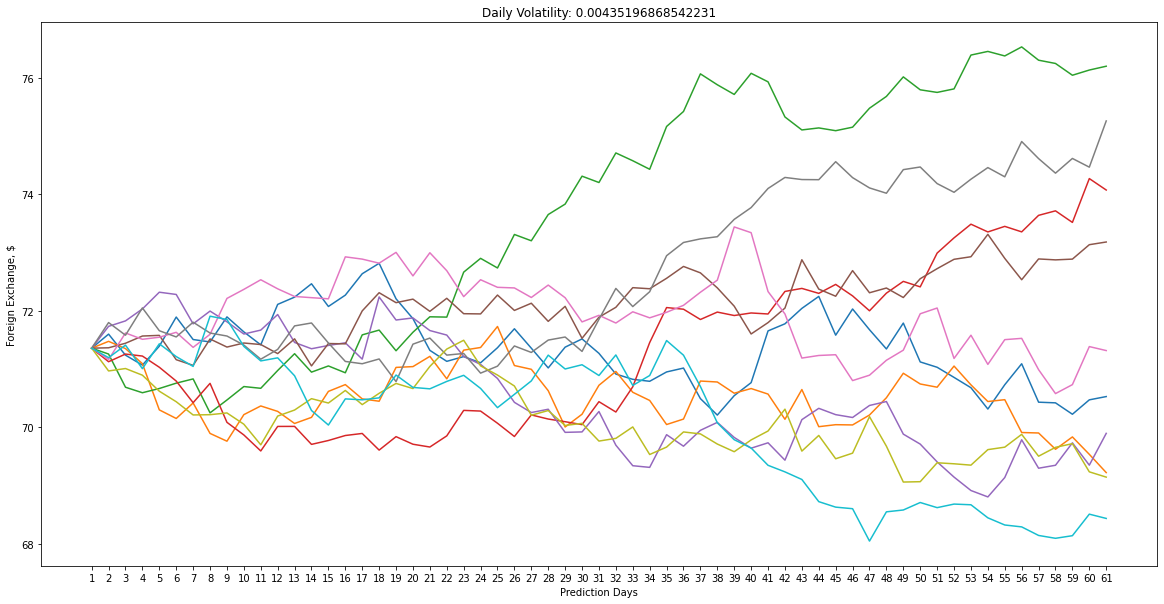

CHINA - YUAN/US$


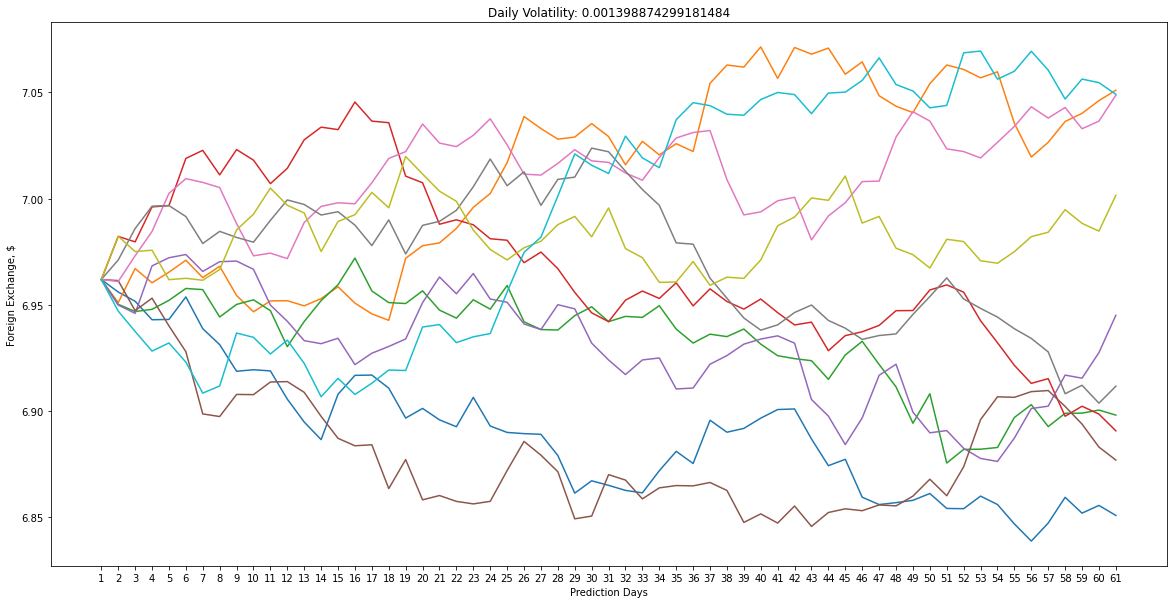

JAPAN - YEN/US$


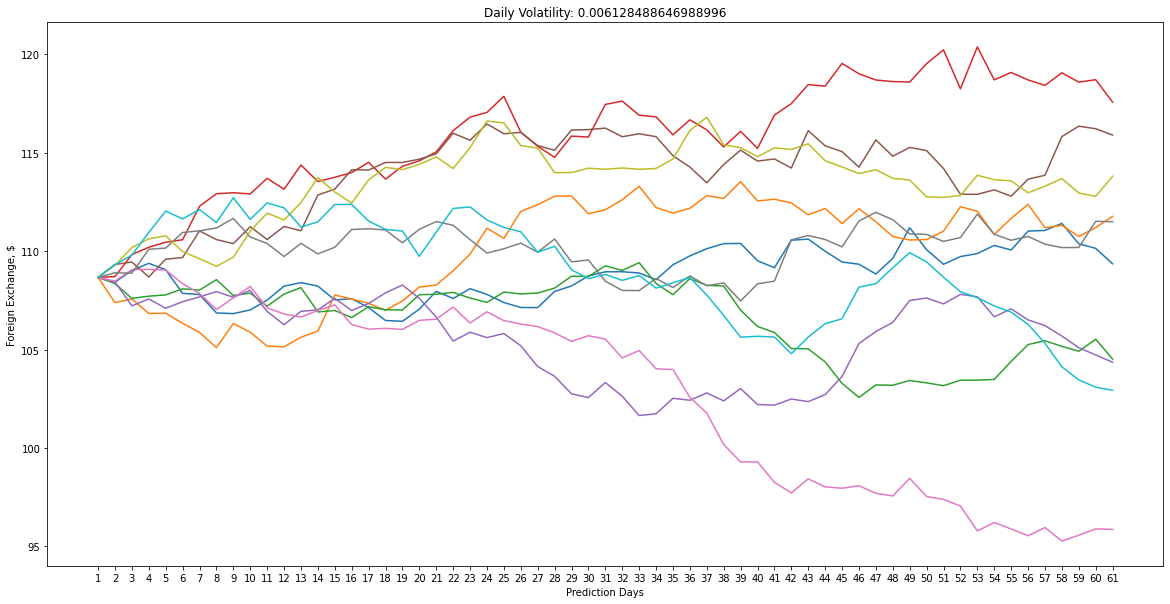

UNITED KINGDOM - UNITED KINGDOM POUND/US$


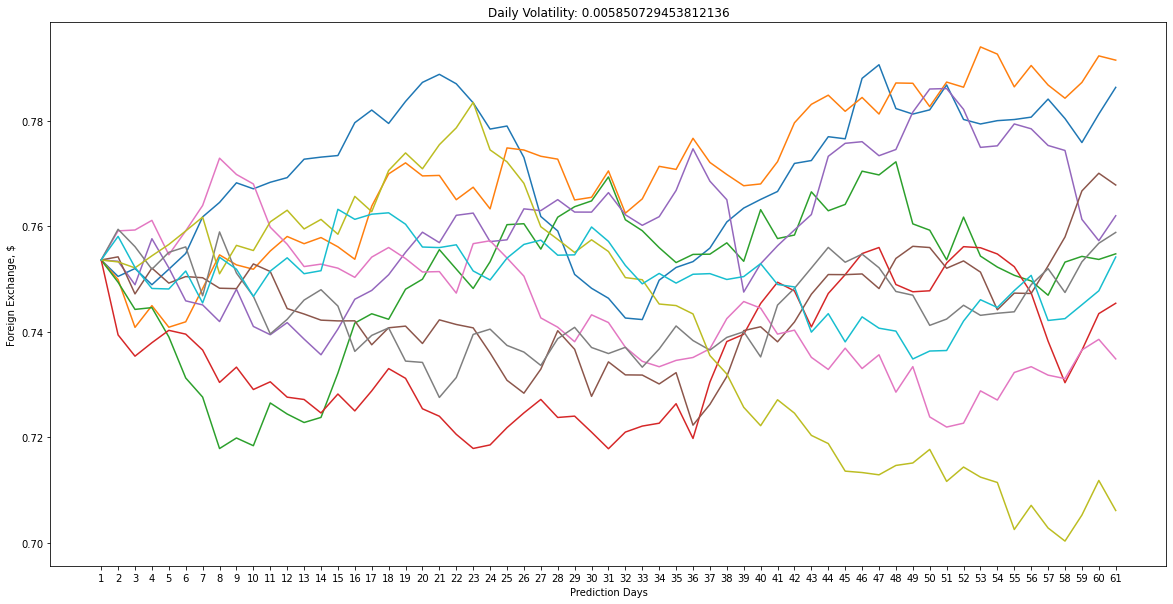

BRAZIL - REAL/US$


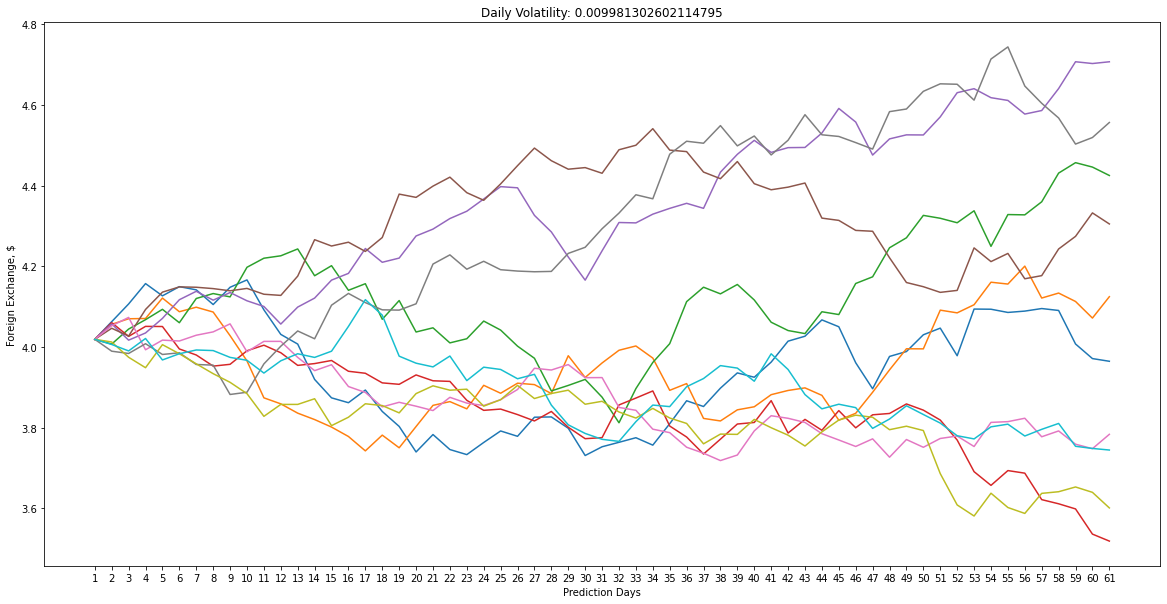

In [ ]:
for col in new_df.columns:
    s0=new_df[col][-1]
    dt=0.5
    T=30
    N=T/dt
    t = np.arange(1, int(N) + 1)
    returns = (new_df.loc[new_df.index[1]:, col] - new_df.shift(1).loc[new_df.index[1]:, col]) / new_df.shift(1).loc[new_df.index[1]:, col]
    mu = np.mean(returns)
    sigma = np.std(returns)
    scen_size = 10
    b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
    W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
    S = np.array([s0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
    S = np.hstack((np.array([[s0] for scen in range(scen_size)]), S))
    plt.figure(figsize = (20,10))
    x= np.arange(1,62)
    print("{}".format(col))
    for i in range(scen_size):
        plt.title("Daily Volatility: " + str(sigma))
        plt.plot(x, S[i, :])
        plt.xticks(x)
        plt.ylabel('Foreign Exchange, $')
        plt.xlabel('Prediction Days')
        
    plt.show()




In [ ]:
new_df.head()

INDIA - INDIAN RUPEE/US$  ...  BRAZIL - REAL/US$
Time Serie                            ...                   
2000-01-03                     43.55  ...             1.8050
2000-01-04                     43.55  ...             1.8405
2000-01-05                     43.55  ...             1.8560
2000-01-06                     43.55  ...             1.8400
2000-01-07                     43.55  ...             1.8310

[5 rows x 5 columns]

# Martingale Prediction

INDIA - INDIAN RUPEE/US$


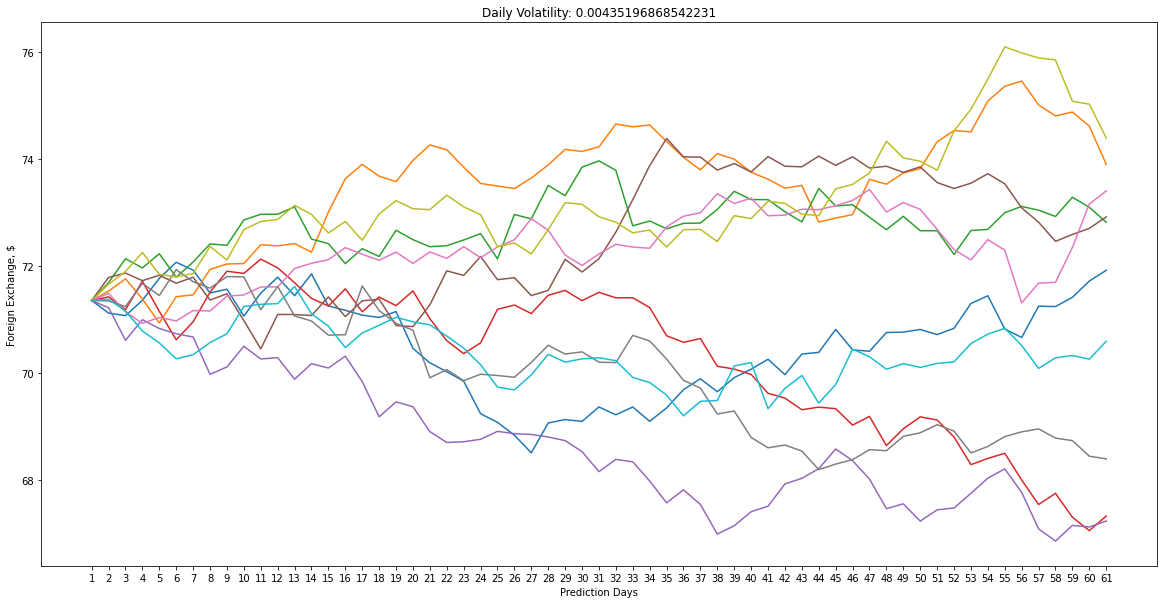

CHINA - YUAN/US$


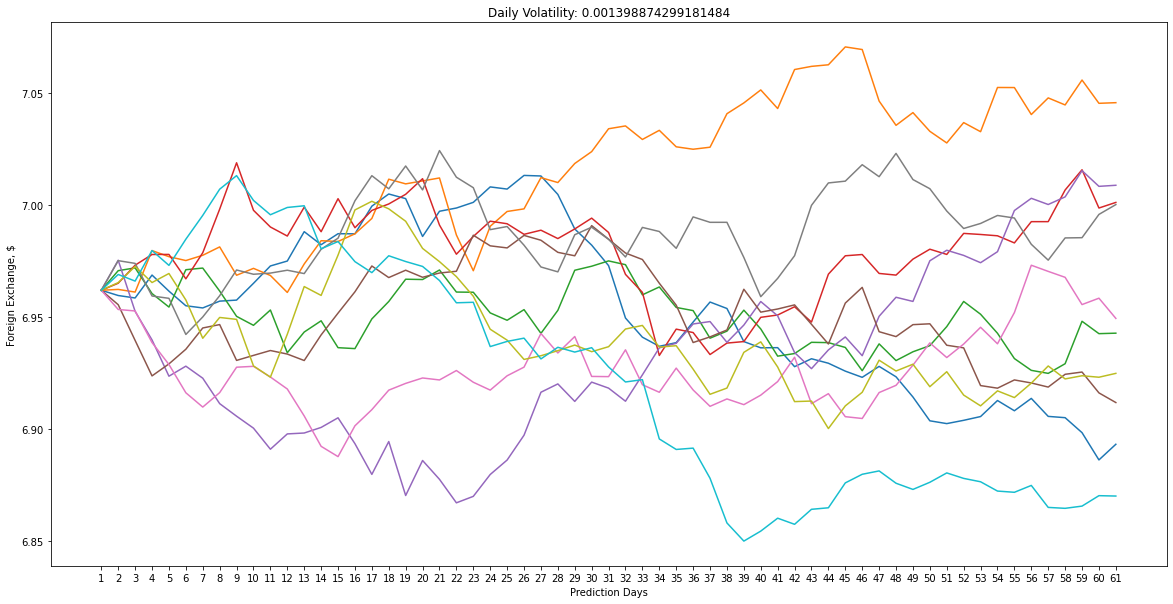

JAPAN - YEN/US$


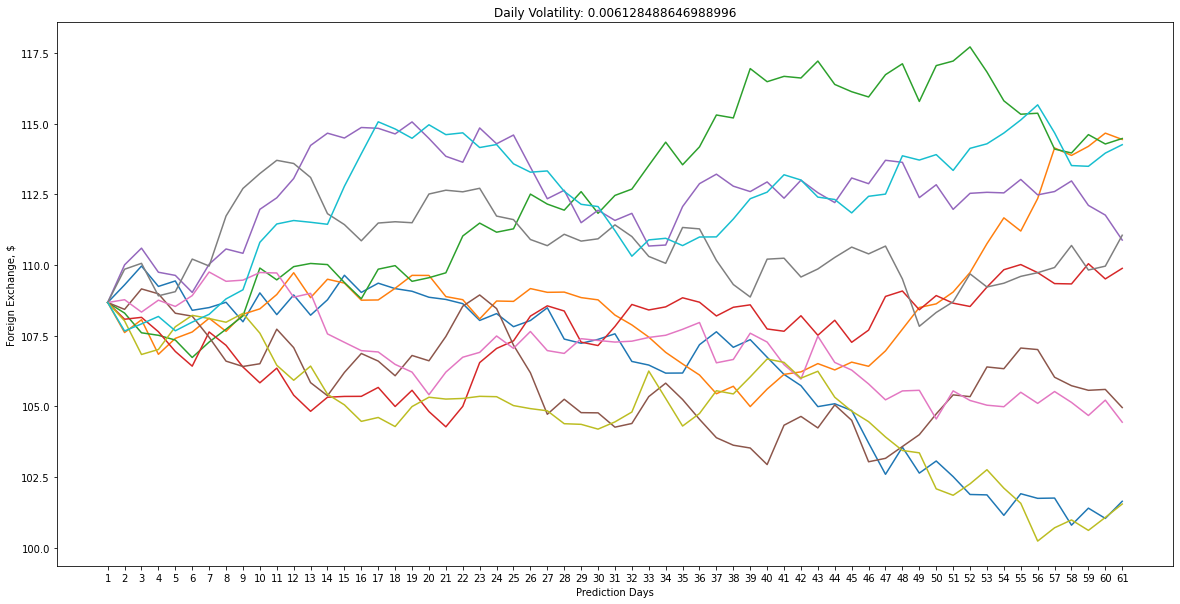

UNITED KINGDOM - UNITED KINGDOM POUND/US$


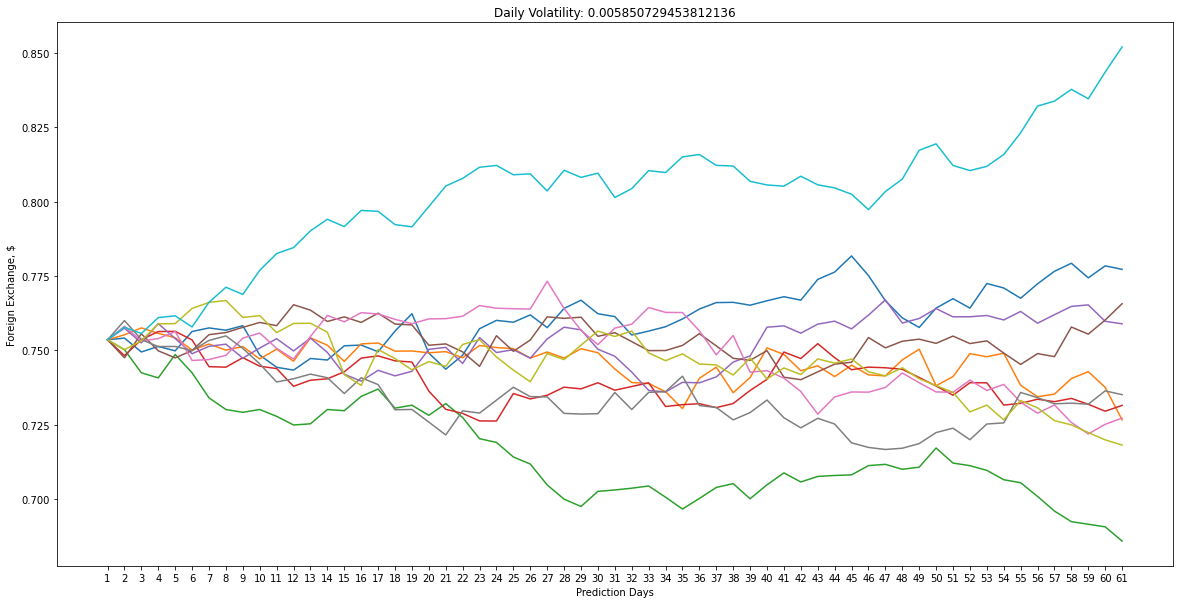

BRAZIL - REAL/US$


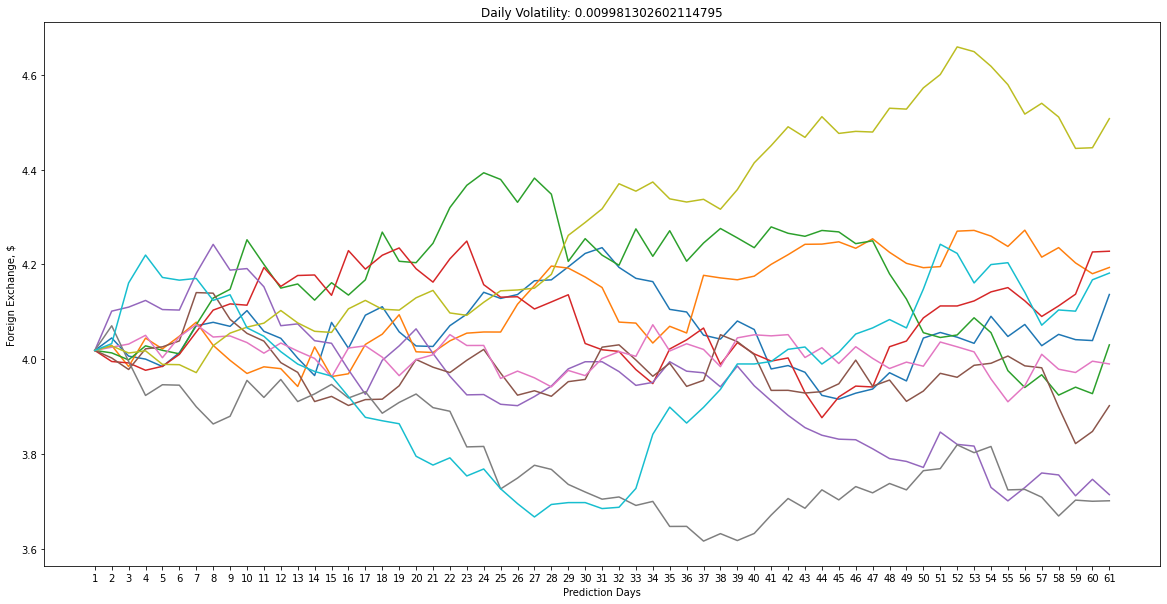

In [ ]:
for col in new_df.columns:
    s0=new_df[col][-1]
    dt=0.5
    T=30
    N=T/dt
    t = np.arange(1, int(N) + 1)
    returns = (new_df.loc[new_df.index[1]:, col] - new_df.shift(1).loc[new_df.index[1]:, col]) / new_df.shift(1).loc[new_df.index[1]:, col]
    mu = np.mean(returns)
    sigma = np.std(returns)
    scen_size = 10
    b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
    W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
    drift = 0
    diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
    S = np.array([s0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
    S = np.hstack((np.array([[s0] for scen in range(scen_size)]), S))
    plt.figure(figsize = (20,10))
    x= np.arange(1,62)
    print("{}".format(col))
    for i in range(scen_size):
        plt.title("Daily Volatility: " + str(sigma))
        plt.plot(x, S[i, :])
        plt.xticks(x)
        plt.ylabel('Foreign Exchange, $')
        plt.xlabel('Prediction Days')
        
    plt.show()




# Accuracy



In [ ]:
new_df.head()

INDIA - INDIAN RUPEE/US$  ...  BRAZIL - REAL/US$
Time Serie                            ...                   
2000-01-03                     43.55  ...             1.8050
2000-01-04                     43.55  ...             1.8405
2000-01-05                     43.55  ...             1.8560
2000-01-06                     43.55  ...             1.8400
2000-01-07                     43.55  ...             1.8310

[5 rows x 5 columns]

INDIA - INDIAN RUPEE/US$


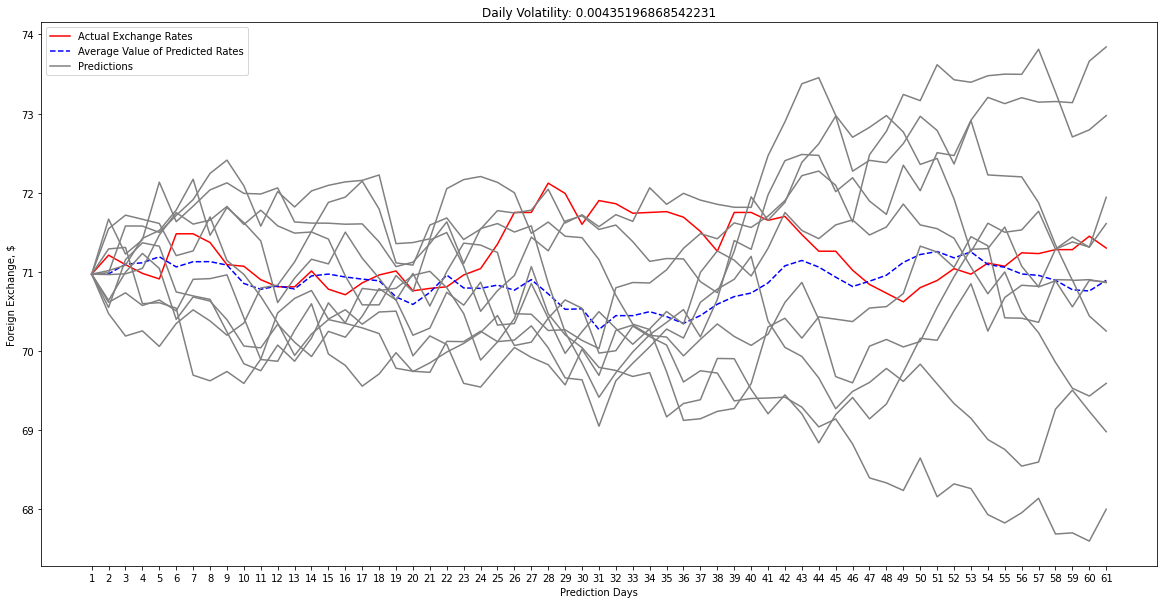

Accuracy for GBM:0.47754969632110894


In [ ]:
col='INDIA - INDIAN RUPEE/US$'
s0=new_df[col][-62]
dt=0.5
T=30
N=T/dt
t = np.arange(1, int(N) + 1)
returns = (new_df.loc[new_df.index[1]:, col] - new_df.shift(1).loc[new_df.index[1]:, col]) / new_df.shift(1).loc[new_df.index[1]:, col]
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 10
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
S = np.array([s0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[s0] for scen in range(scen_size)]), S))
actual_value= []

actual_value=list(new_df[col][-62:-1]) 

average_value= []
for i in range(61):
    average_value.append(0)
for i in range(scen_size):
    for j in range(61):
        average_value[j] +=S[i][j]

for i in range(61):
    average_value[i] = average_value[i]/float(scen_size)*1.00
plt.figure(figsize = (20,10))

plt.plot(x,actual_value,'r')
plt.plot(x,average_value,'b--')
x= np.arange(1,62)
print("{}".format(col))
for i in range(scen_size):
      plt.title("Daily Volatility: " + str(sigma))
      plt.plot(x, S[i, :],'grey')
      plt.xticks(x)
      plt.ylabel('Foreign Exchange, $')
      plt.xlabel('Prediction Days')
plt.legend(('Actual Exchange Rates','Average Value of Predicted Rates','Predictions'))        
plt.show()
print('Accuracy for GBM:{}'.format(mean_absolute_error(actual_value,average_value)))

In [ ]:
def mean_absolute_error(a,b):
    sum=0
    for i in range(len(a)):
        sum +=abs(a[i]-b[i])
    return sum/ float(len(a))*1.00    

In [ ]:
type(actual_value)

list

In [ ]:
col='INDIA - INDIAN RUPEE/US$'
s0=new_df[col][-62]
dt=0.5
T=30
N=T/dt
t = np.arange(1, int(N) + 1)
returns = (new_df.loc[new_df.index[1]:, col] - new_df.shift(1).loc[new_df.index[1]:, col]) / new_df.shift(1).loc[new_df.index[1]:, col]
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 10
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
S = np.array([s0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[s0] for scen in range(scen_size)]), S))


# GBM Predictions

INDIA - INDIAN RUPEE/US$


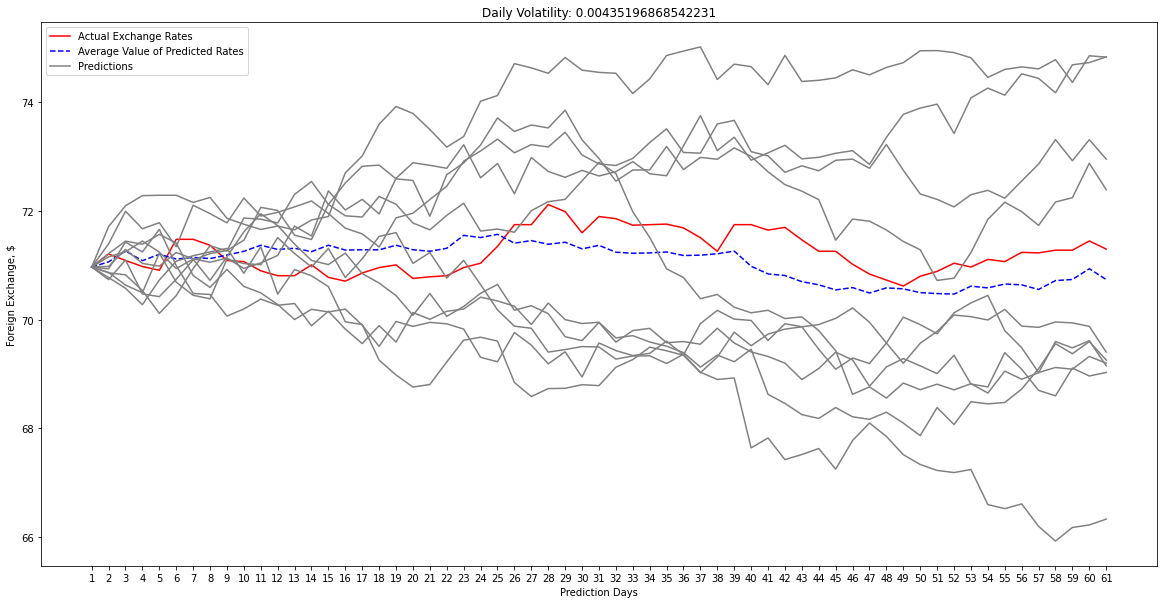

Accuracy for GBM:0.4351856275763823
CHINA - YUAN/US$


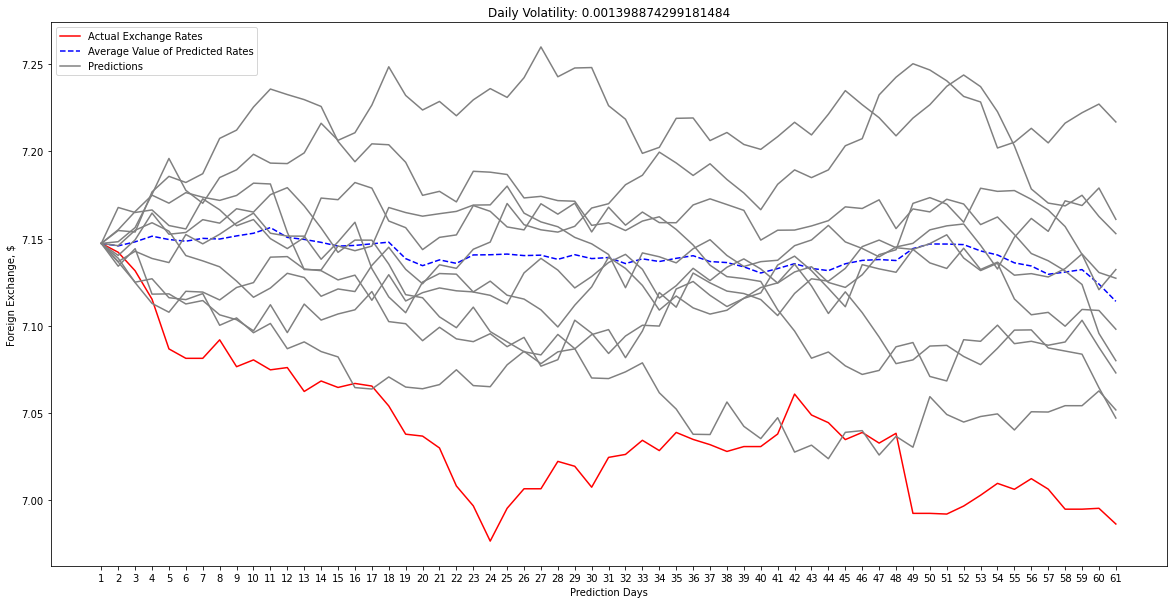

Accuracy for GBM:0.1021590850524681
JAPAN - YEN/US$


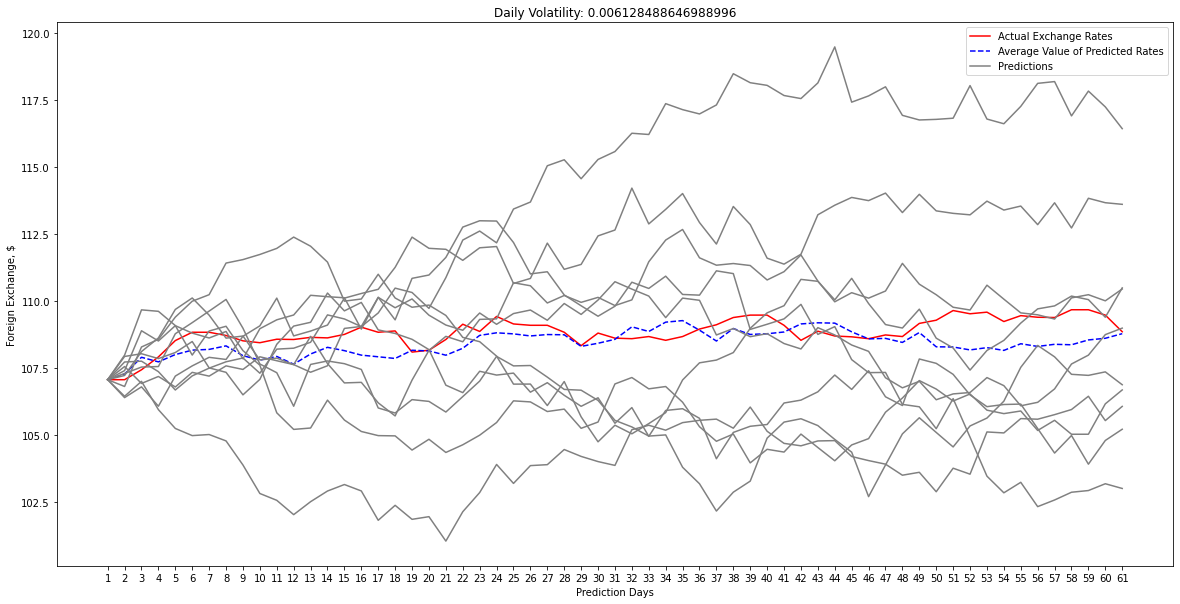

Accuracy for GBM:0.5562348127508284
UNITED KINGDOM - UNITED KINGDOM POUND/US$


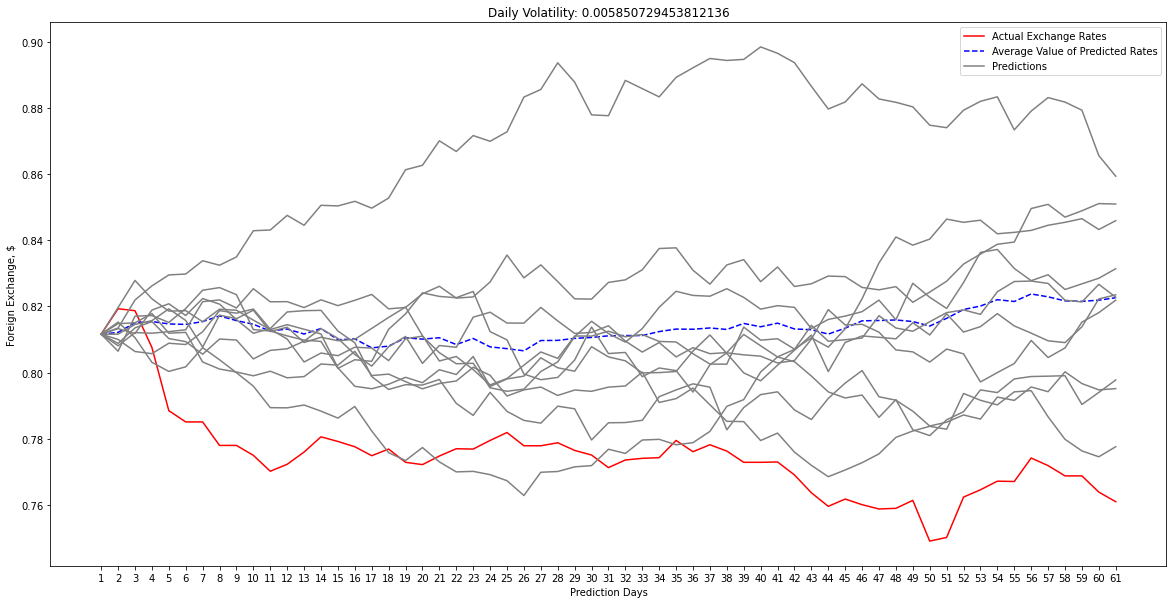

Accuracy for GBM:0.03949190842843674
BRAZIL - REAL/US$


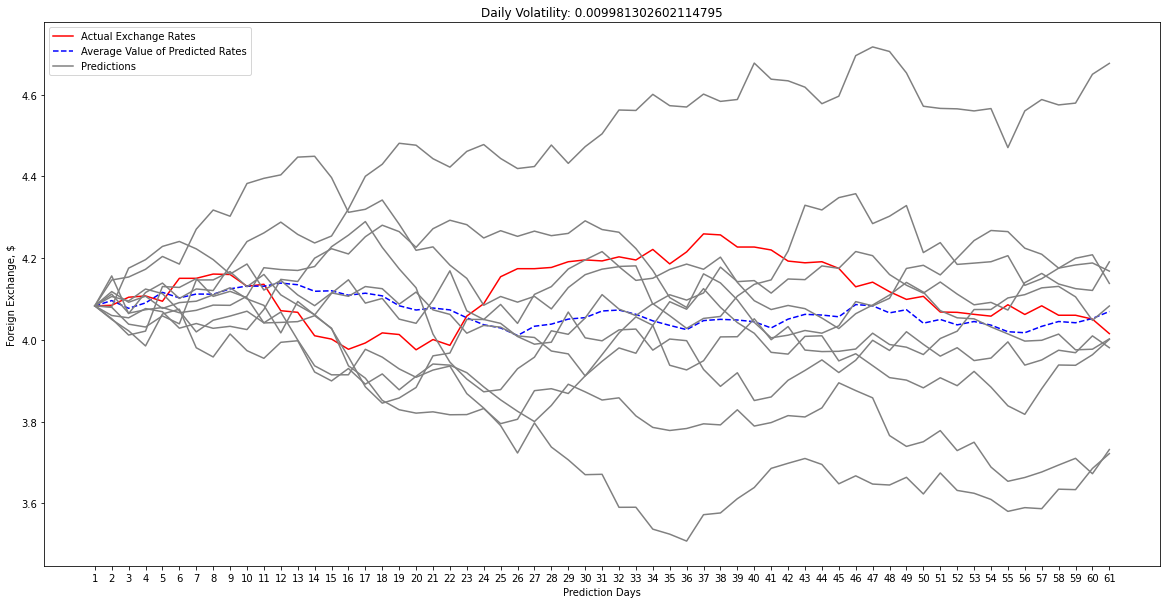

Accuracy for GBM:0.08478974552066308


In [ ]:
for col in new_df.columns:
    s0=new_df[col][-62]
    dt=0.5
    T=30
    N=T/dt
    t = np.arange(1, int(N) + 1)
    returns = (new_df.loc[new_df.index[1]:, col] - new_df.shift(1).loc[new_df.index[1]:, col]) / new_df.shift(1).loc[new_df.index[1]:, col]
    mu = np.mean(returns)
    sigma = np.std(returns)
    scen_size = 10
    b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
    W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
    S = np.array([s0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
    S = np.hstack((np.array([[s0] for scen in range(scen_size)]), S))
    actual_value= []

    actual_value=list(new_df[col][-62:-1]) 

    average_value= []
    for i in range(61):
        average_value.append(0)
    for i in range(scen_size):
        for j in range(61):
            average_value[j] +=S[i][j]

    for i in range(61):
        average_value[i] = average_value[i]/float(scen_size)*1.00
    plt.figure(figsize = (20,10))

    plt.plot(x,actual_value,'r')
    plt.plot(x,average_value,'b--')
    x= np.arange(1,62)
    print("{}".format(col))
    for i in range(scen_size):
          plt.title("Daily Volatility: " + str(sigma))
          plt.plot(x, S[i, :],'grey')
          plt.xticks(x)
          plt.ylabel('Foreign Exchange, $')
          plt.xlabel('Prediction Days')
    plt.legend(('Actual Exchange Rates','Average Value of Predicted Rates','Predictions'))        
    plt.show()
    print('Accuracy for GBM:{}'.format(mean_absolute_error(actual_value,average_value)))

# Martingale Predictions



INDIA - INDIAN RUPEE/US$


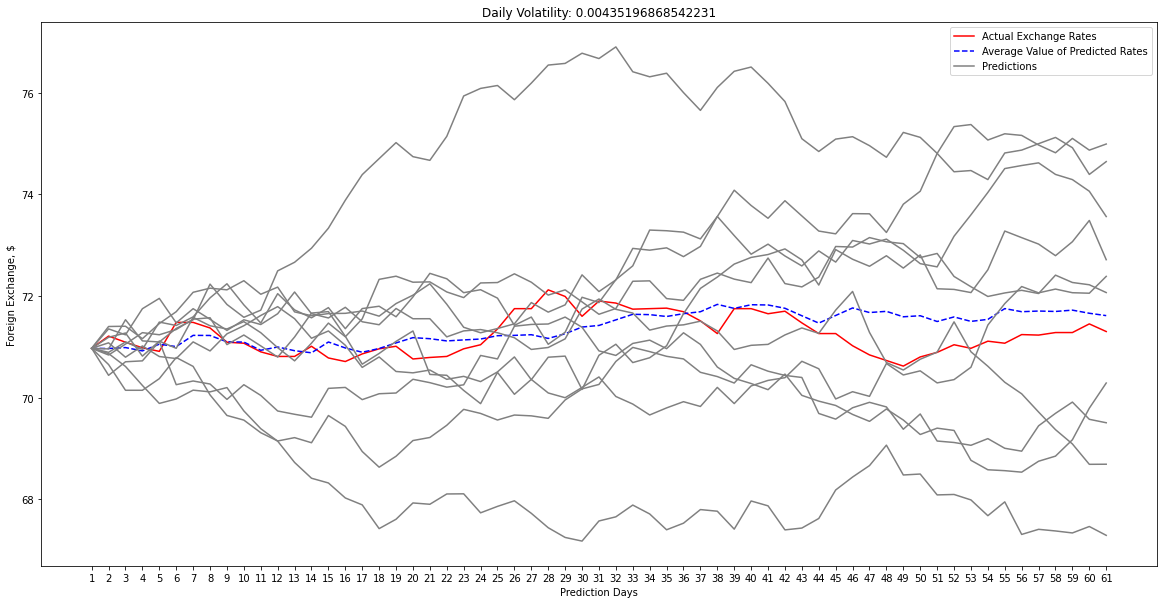

Accuracy for Martingale:0.3193479523251424
CHINA - YUAN/US$


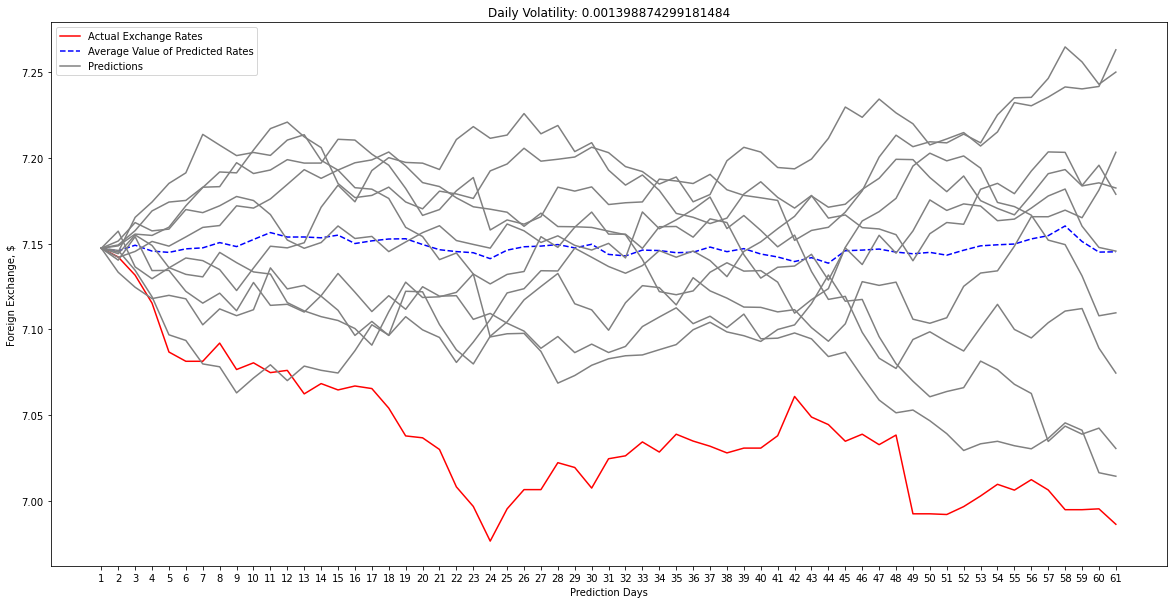

Accuracy for Martingale:0.10928335307004139
JAPAN - YEN/US$


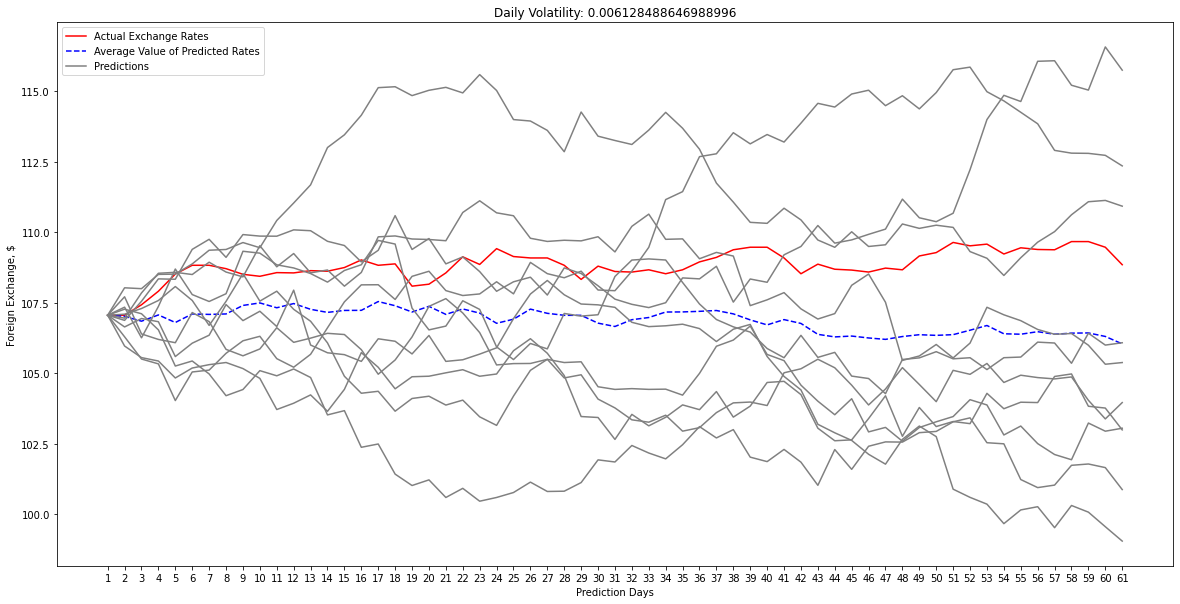

Accuracy for Martingale:1.949970593769431
UNITED KINGDOM - UNITED KINGDOM POUND/US$


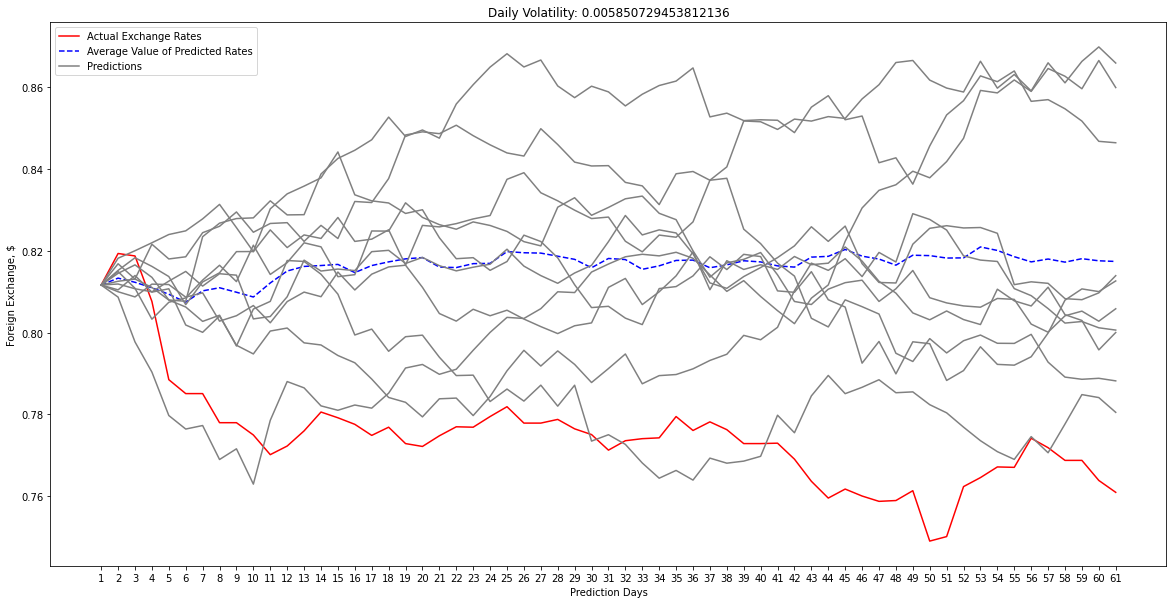

Accuracy for Martingale:0.04192307891527226
BRAZIL - REAL/US$


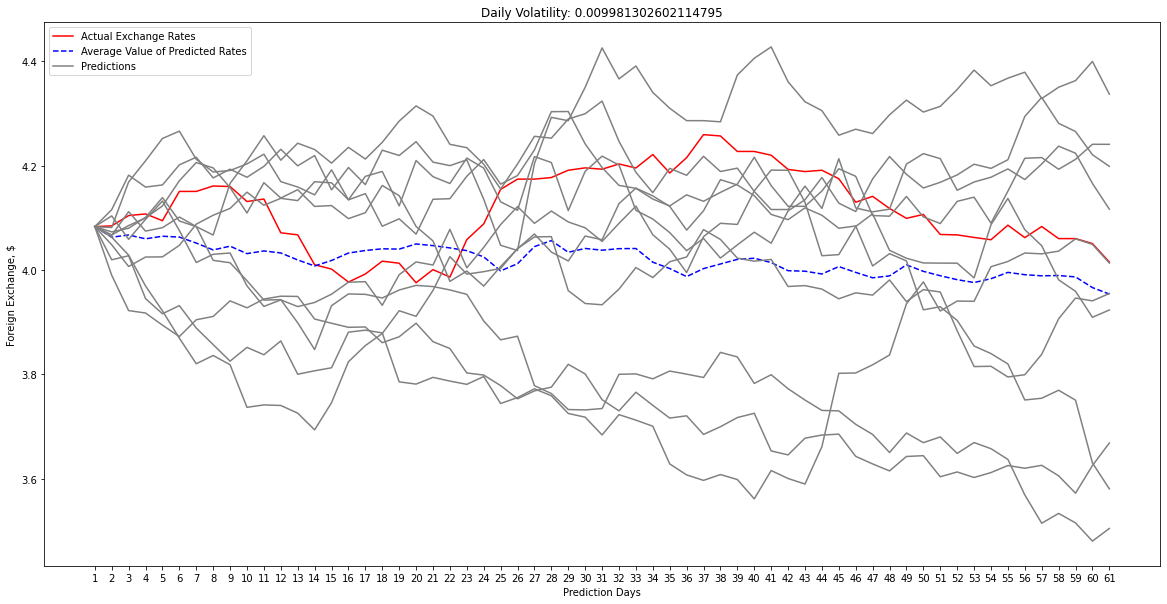

Accuracy for Martingale:0.10830984536178408


In [ ]:
for col in new_df.columns:
    s0=new_df[col][-62]
    dt=0.5
    T=30
    N=T/dt
    t = np.arange(1, int(N) + 1)
    returns = (new_df.loc[new_df.index[1]:, col] - new_df.shift(1).loc[new_df.index[1]:, col]) / new_df.shift(1).loc[new_df.index[1]:, col]
    mu = np.mean(returns)
    sigma = np.std(returns)
    scen_size = 10
    b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
    W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
    drift = 0
    diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
    S = np.array([s0 * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
    S = np.hstack((np.array([[s0] for scen in range(scen_size)]), S))
    actual_value= []

    actual_value=list(new_df[col][-62:-1]) 

    average_value= []
    for i in range(61):
        average_value.append(0)
    for i in range(scen_size):
        for j in range(61):
            average_value[j] +=S[i][j]

    for i in range(61):
        average_value[i] = average_value[i]/float(scen_size)*1.00
    plt.figure(figsize = (20,10))

    plt.plot(x,actual_value,'r')
    plt.plot(x,average_value,'b--')
    x= np.arange(1,62)
    print("{}".format(col))
    for i in range(scen_size):
          plt.title("Daily Volatility: " + str(sigma))
          plt.plot(x, S[i, :],'grey')
          plt.xticks(x)
          plt.ylabel('Foreign Exchange, $')
          plt.xlabel('Prediction Days')
    plt.legend(('Actual Exchange Rates','Average Value of Predicted Rates','Predictions'))        
    plt.show()
    print('Accuracy for Martingale:{}'.format(mean_absolute_error(actual_value,average_value)))